## ASSIGMENT 4

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Question 1
1. Demographic:

    a. Which 2 demographics have proven to be the most popular with the telco brand?
    
    b. If the marketing team wanted to increase customer retention, to whom should
    they target their advertisements to?


In [5]:
churn_no = df[df['Churn'] == 'No']
churn_yes = df[df['Churn'] == 'Yes']

In [7]:
churn_no.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No


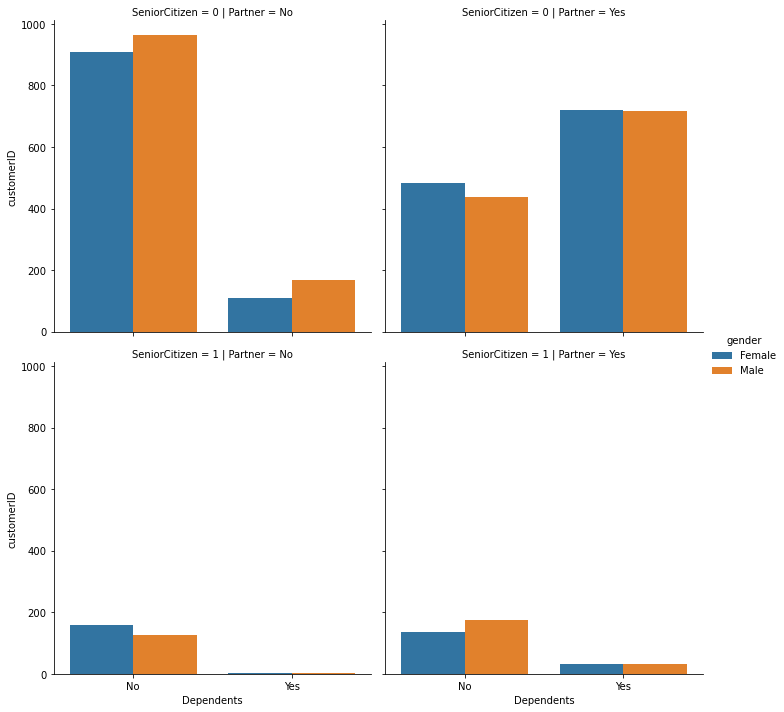

In [9]:
demo_no = churn_no.groupby(['gender', 'SeniorCitizen', 'Partner','Dependents'])['customerID'].count().reset_index()
sns.catplot(x = 'Dependents', y = 'customerID', row = 'SeniorCitizen', col = 'Partner', hue = 'gender', data = demo_no, kind = 'bar')

 1. Demographic:
 
 b. If the marketing team wanted to increase customer retention, to whom should
    they target their advertisements to?

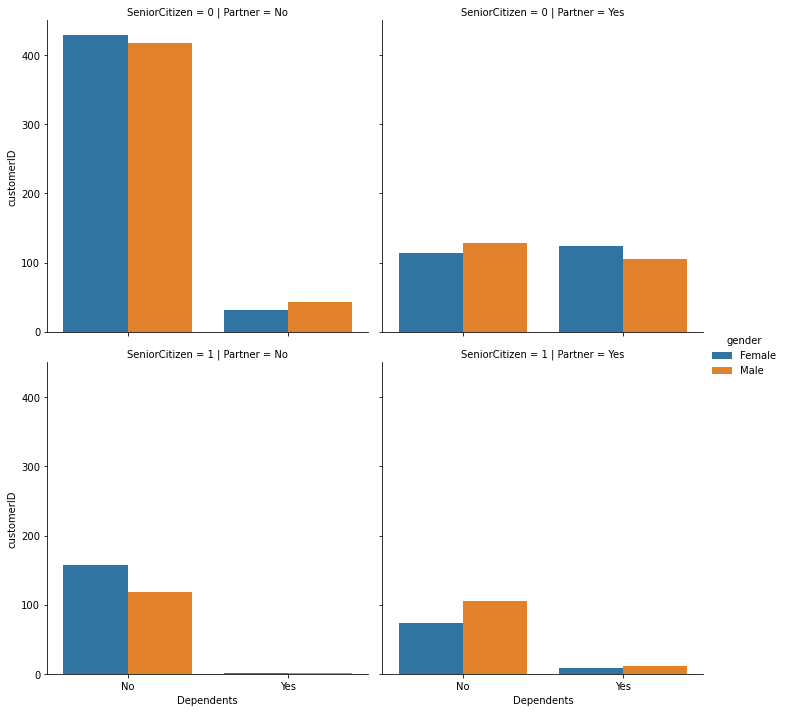

In [10]:
demo_yes = churn_yes.groupby(['gender', 'SeniorCitizen', 'Partner','Dependents'])['customerID'].count().reset_index()
sns.catplot(x = 'Dependents', y = 'customerID', row = 'SeniorCitizen', col = 'Partner', hue = 'gender', data = demo_yes, kind = 'bar')

## Conclusion: 
The 2 demographics that prove to be most popular in the Telco brand are the young and single who are male with no dependance. Therefore the Telco brand should target these two demographics in their marketing adverts.

## 2. Services:
    a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)


In [15]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

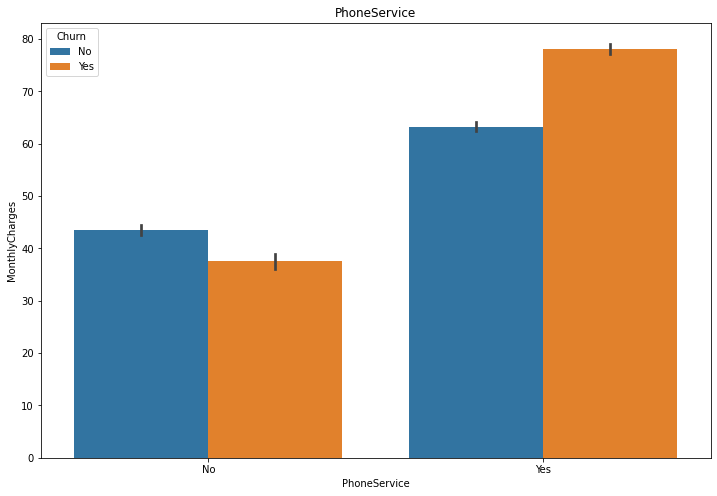

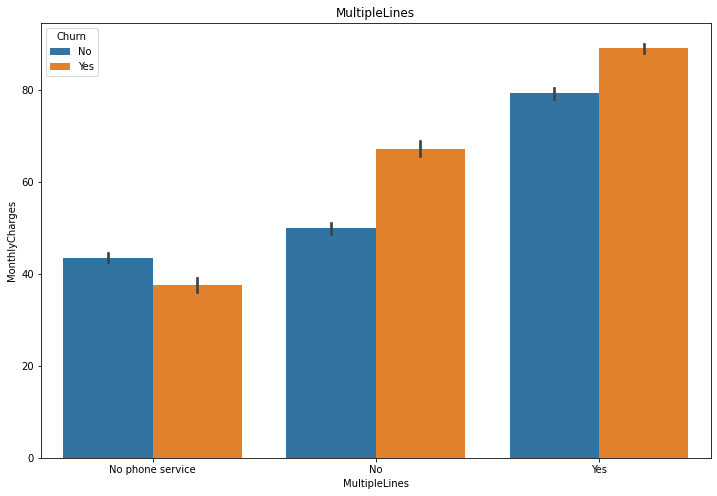

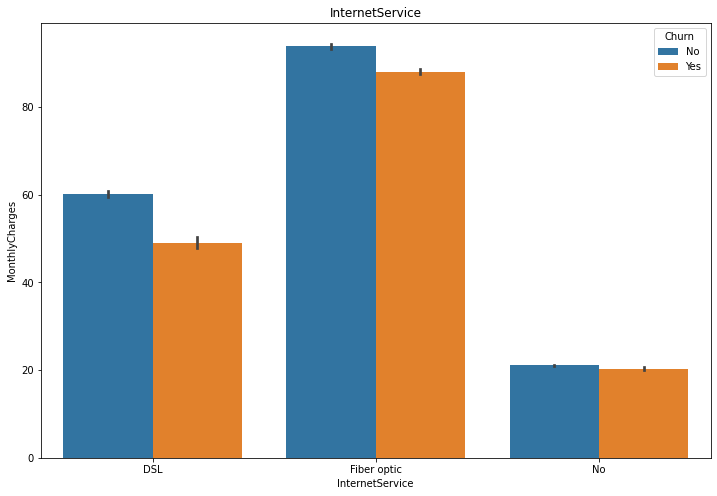

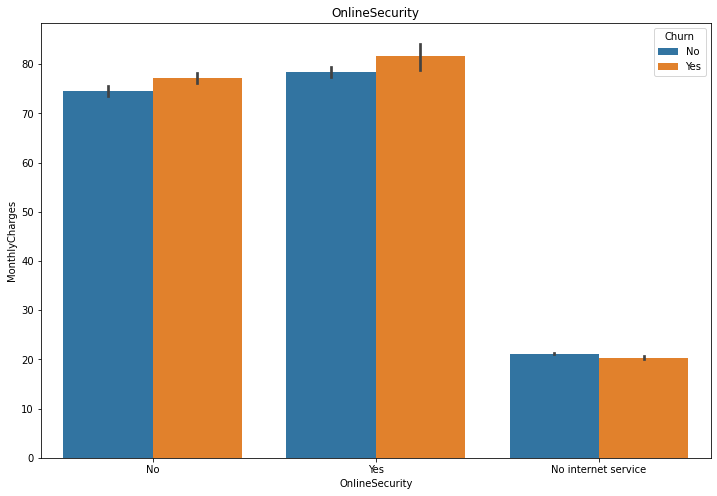

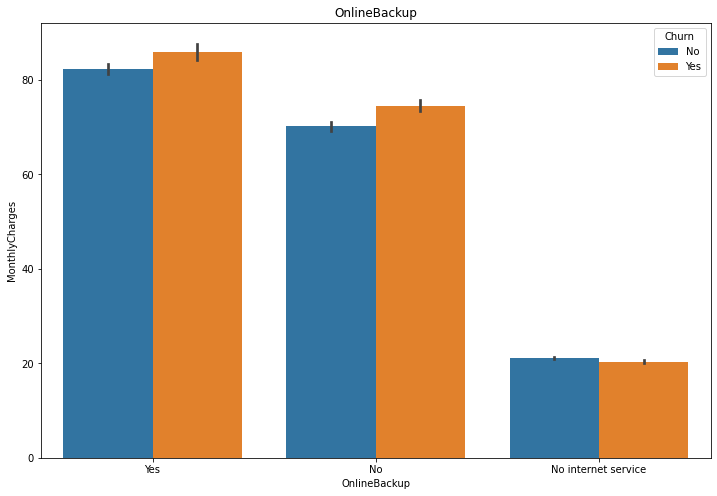

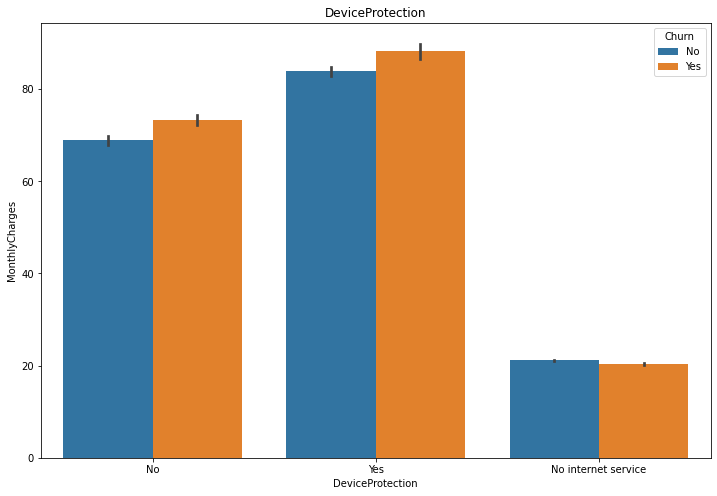

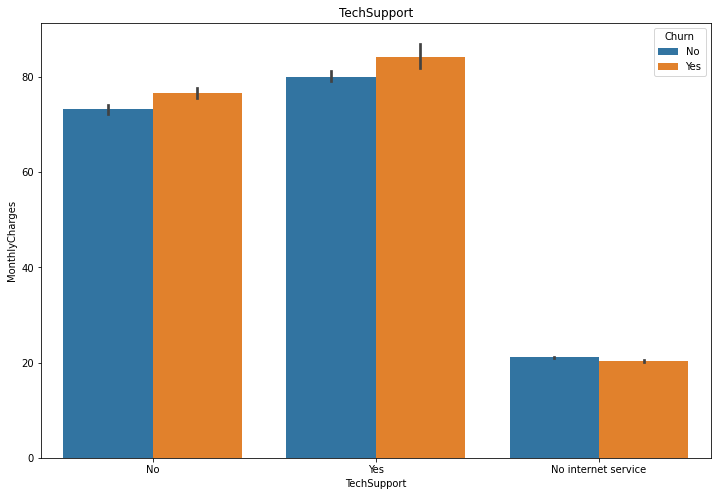

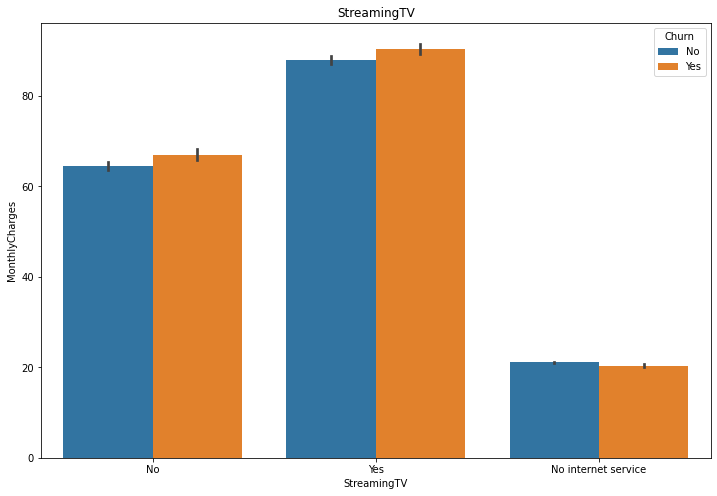

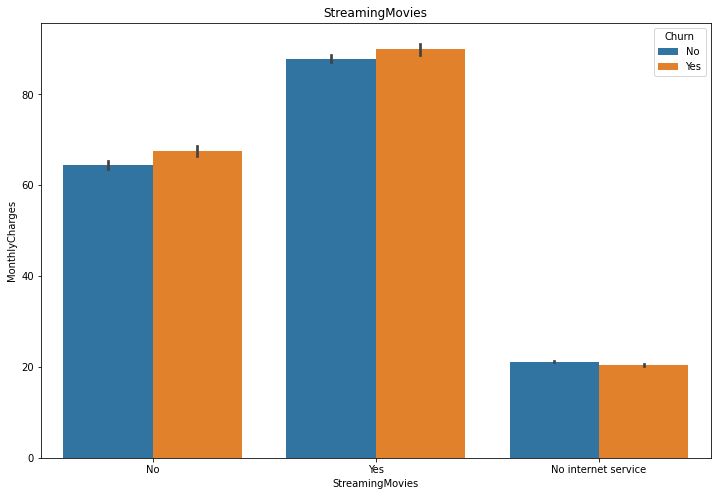

In [17]:
services = ['PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies']
for service in services:
    plt.figure(figsize = (12,8))
    sns.barplot(x = service, y = 'MonthlyCharges', data = df, hue = 'Churn')
    plt.title(service)
    plt.show()

The 3 services are PhoneService, MultipleLines and TechSupport

b. If the telco was to offer Phone as a standalone service, which type of contract
would encourage customer retention?

In [29]:
phone_service = df[df['PhoneService'] == 'Yes']
phone_service.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


<AxesSubplot:xlabel='Contract', ylabel='count'>

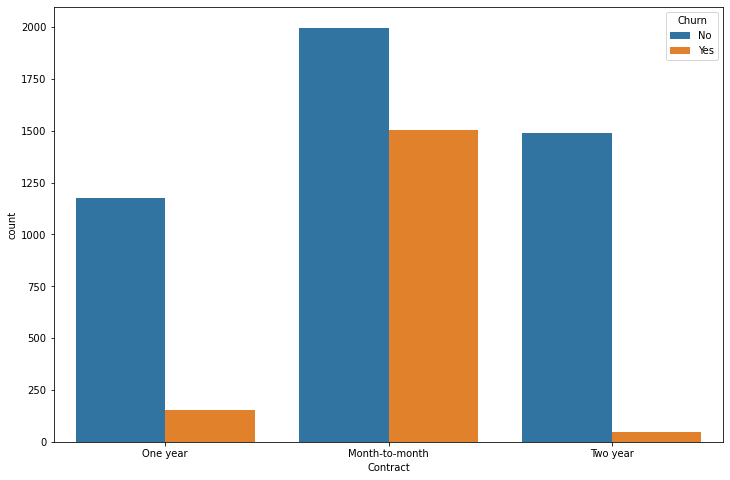

In [30]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'Contract', hue = 'Churn', data = phone_service )

The Telco would be in a better position offering a two year contract because very few customers are churned out of this category.

3. Payment: (Use visualizations in explaining your analysis)
    
    a. If the company was to streamline all its services into 3 bouquet packages, what
    monthly prices will be appropriate for the following packages to keep customers
    from churning:
        i. Basic
        ii. Plus
        iii. Premium


b. Should the company strictly go paperless for their monthly billings as a technique
of keeping their customers and why?

<Figure size 864x576 with 0 Axes>

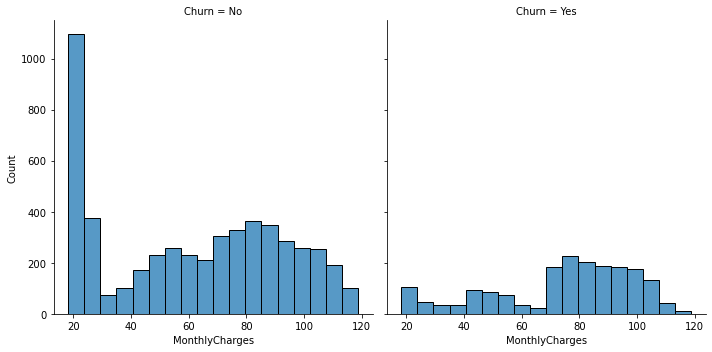

In [31]:
plt.figure(figsize = (12, 8))
sns.displot(x = 'MonthlyCharges', col = 'Churn', data = df )

In [36]:
churn_no['MonthlyCharges'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [37]:
churn_yes['MonthlyCharges'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

According to the visualization above, we would accord the prices as follows:

     i. Basic - $20
     ii. Plus - $65
     iii. Premium - $80

b. Should the company strictly go paperless for their monthly billings as a technique
of keeping their customers and why?

In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

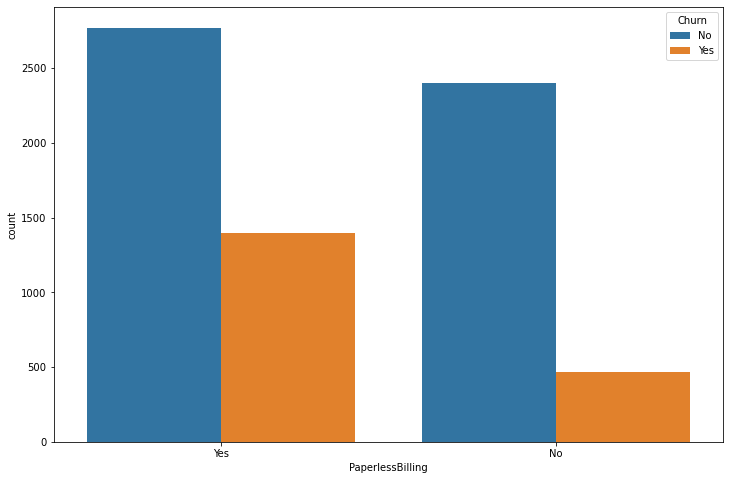

In [39]:
plt.figure(figsize = (12, 8))
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = df )

As much as majority of the telco brand customers use paeprless payment, it would not be wise for it to strictly go paperless since most of its customers are churning from that segment. 